# Regression Model selection

## Manual comparison

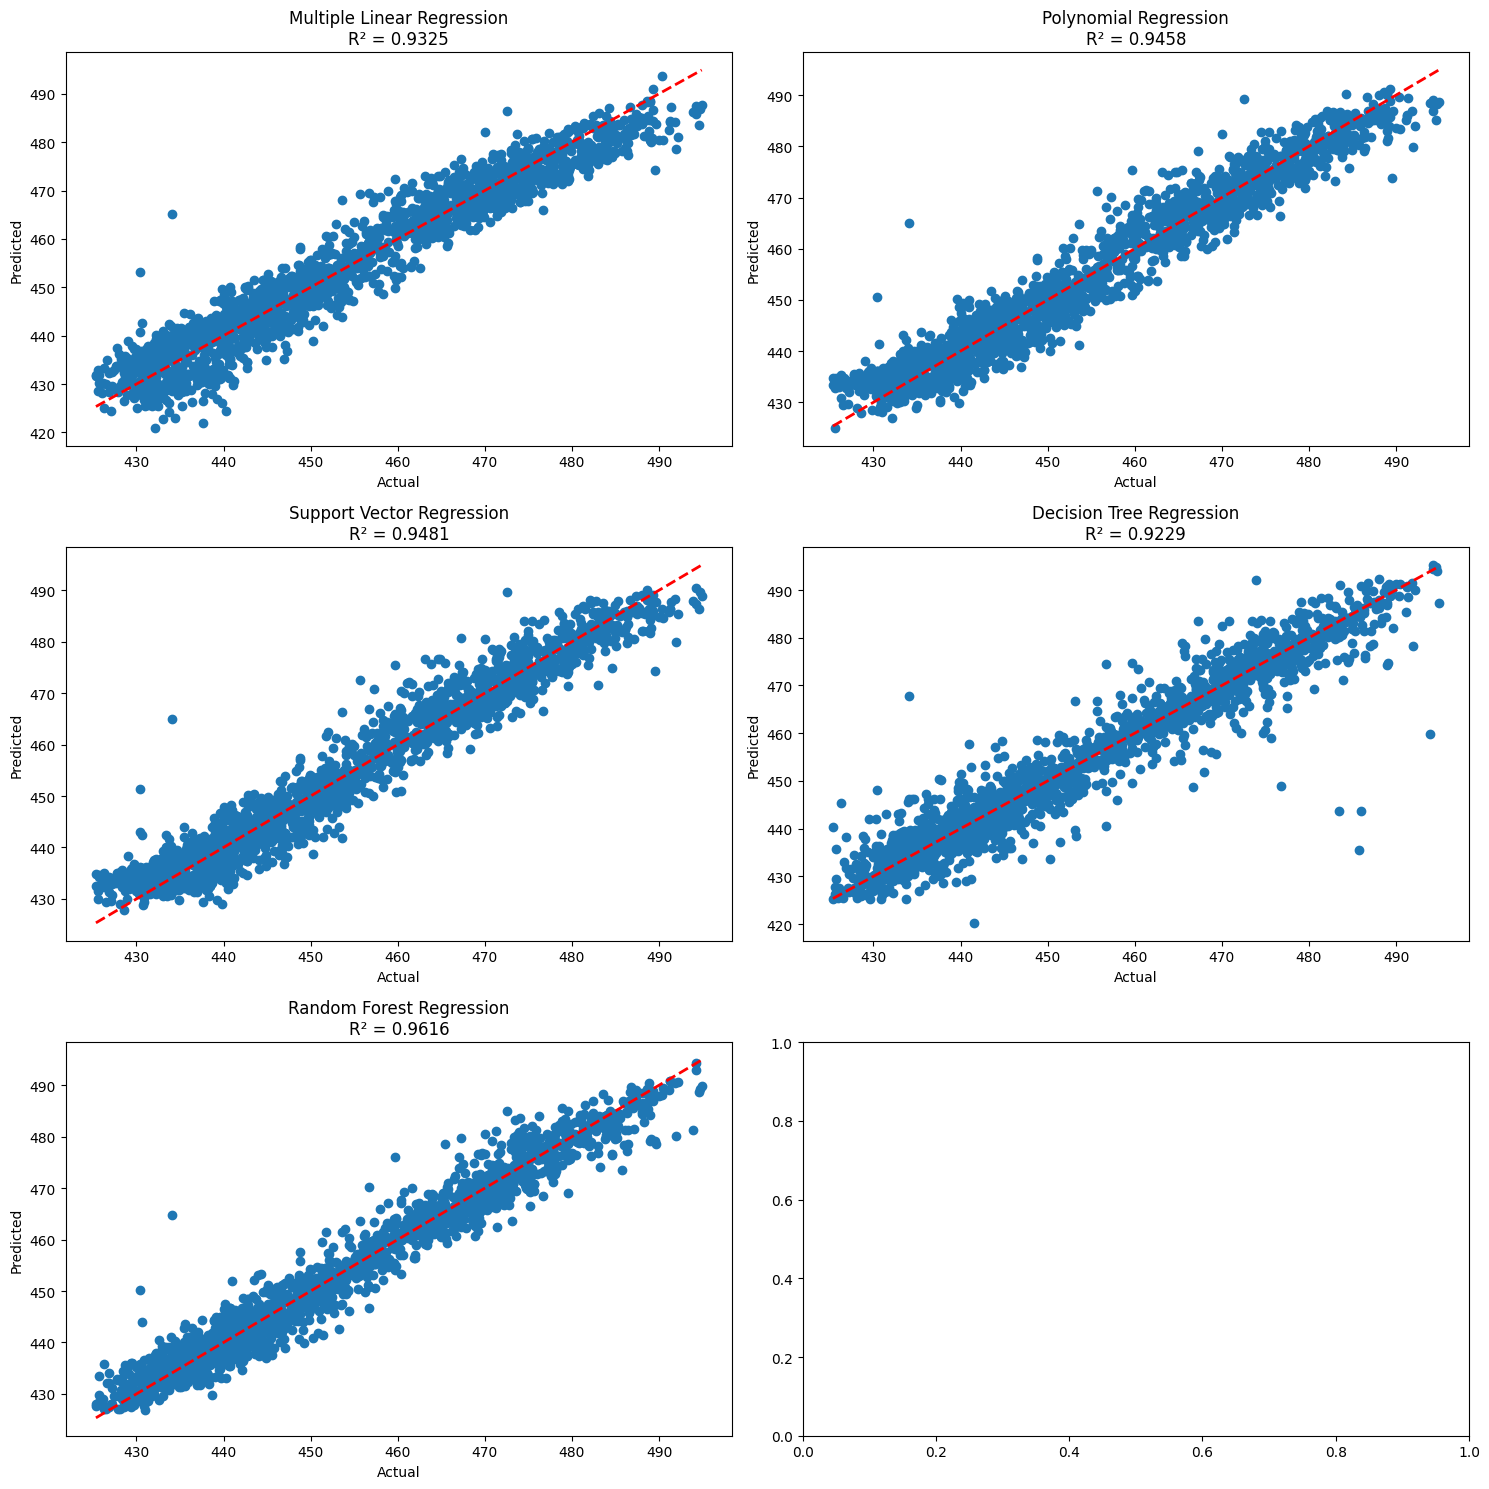


Manual Model Comparison:
Model                          R² Score  
--------------------------------------------------
Multiple Linear Regression     0.9325    
Polynomial Regression          0.9458    
Support Vector Regression      0.9481    
Decision Tree Regression       0.9229    
Random Forest Regression       0.9616    


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
import math
import os

# Create outputs folder if it doesn't exist
if not os.path.exists('outputs'):
    os.makedirs('outputs')

# Load and prepare data
dataset = pd.read_csv('raw_data/Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Function to train, evaluate and plot manual models
def train_evaluate_and_plot(models, X_train, y_train, X_test, y_test):
    num_models = len(models)
    rows = math.ceil(num_models / 2)
    cols = min(num_models, 2)
    
    fig, axs = plt.subplots(rows, cols, figsize=(15, 5*rows))
    if rows == 1 and cols == 1:
        axs = [axs]
    elif rows == 1 or cols == 1:
        axs = axs.flatten()
    
    manual_results = []
    
    for i, (name, model, is_svr) in enumerate(models):
        if is_svr:
            sc_X = StandardScaler()
            sc_y = StandardScaler()
            X_train_scaled = sc_X.fit_transform(X_train)
            y_train_scaled = sc_y.fit_transform(y_train.reshape(-1, 1)).ravel()
            model.fit(X_train_scaled, y_train_scaled)
            y_pred = sc_y.inverse_transform(model.predict(sc_X.transform(X_test)).reshape(-1, 1)).ravel()
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
        
        r2 = r2_score(y_test, y_pred)
        manual_results.append((name, r2))
        
        row = i // 2
        col = i % 2
        ax = axs[row] if cols == 1 else axs[row, col]
        
        ax.scatter(y_test, y_pred)
        ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
        ax.set_xlabel('Actual')
        ax.set_ylabel('Predicted')
        ax.set_title(f'{name}\nR² = {r2:.4f}')
    
    plt.tight_layout()
    plt.savefig('outputs/manual_models_comparison.png')
    plt.show()  # Display the plot in the notebook
    
    return manual_results

# Manual Models
models = [
    ('Multiple Linear Regression', LinearRegression(), False),
    ('Polynomial Regression', Pipeline([('poly', PolynomialFeatures(degree=4)), ('linear', LinearRegression())]), False),
    ('Support Vector Regression', SVR(kernel='rbf'), True),
    ('Decision Tree Regression', DecisionTreeRegressor(random_state=0), False),
    ('Random Forest Regression', RandomForestRegressor(n_estimators=10, random_state=0), False)
]

# Train, evaluate and plot manual models
manual_results = train_evaluate_and_plot(models, X_train, y_train, X_test, y_test)

# Print results table
print("\nManual Model Comparison:")
print("=" * 50)
print(f"{'Model':<30} {'R² Score':<10}")
print("-" * 50)
for name, r2 in manual_results:
    print(f"{name:<30} {r2:<10.4f}")
print("=" * 50)

## Auto-ML Comparison

### AutoGLuon

No path specified. Models will be saved in: "AutogluonModels/ag-20240902_173239"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.11.9
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Fri Mar 29 23:14:13 UTC 2024
CPU Count:          12
Memory Avail:       5.53 GB / 7.66 GB (72.1%)
Disk Space Avail:   834.11 GB / 1006.85 GB (82.8%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training tim

[1000]	valid_set's l2: 11.9189	valid_set's r2: 0.959011
[2000]	valid_set's l2: 10.7098	valid_set's r2: 0.963169
[3000]	valid_set's l2: 10.0087	valid_set's r2: 0.96558
[4000]	valid_set's l2: 9.54451	valid_set's r2: 0.967176
[5000]	valid_set's l2: 9.27434	valid_set's r2: 0.968106
[6000]	valid_set's l2: 9.04279	valid_set's r2: 0.968902
[7000]	valid_set's l2: 8.87813	valid_set's r2: 0.969468
[8000]	valid_set's l2: 8.77706	valid_set's r2: 0.969816
[9000]	valid_set's l2: 8.70625	valid_set's r2: 0.970059
[10000]	valid_set's l2: 8.64459	valid_set's r2: 0.970271


	0.9703	 = Validation score   (r2)
	9.83s	 = Training   runtime
	0.13s	 = Validation runtime
Fitting model: LightGBM ... Training model for up to 589.39s of the 589.39s of remaining time.


[1000]	valid_set's l2: 7.72962	valid_set's r2: 0.973418


	0.9738	 = Validation score   (r2)
	1.75s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: RandomForestMSE ... Training model for up to 587.58s of the 587.58s of remaining time.
	0.9671	 = Validation score   (r2)
	1.36s	 = Training   runtime
	0.12s	 = Validation runtime
Fitting model: CatBoost ... Training model for up to 585.85s of the 585.85s of remaining time.
	0.9763	 = Validation score   (r2)
	93.24s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: ExtraTreesMSE ... Training model for up to 492.57s of the 492.57s of remaining time.
	0.9669	 = Validation score   (r2)
	0.73s	 = Training   runtime
	0.12s	 = Validation runtime
Fitting model: NeuralNetFastAI ... Training model for up to 491.46s of the 491.46s of remaining time.
	0.9477	 = Validation score   (r2)
	14.48s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: XGBoost ... Training model for up to 476.95s of the 476.94s of remaining time.
	0.9745	 = Validation score   (r2)
	1.55

[1000]	valid_set's l2: 7.24997	valid_set's r2: 0.975067


	0.9752	 = Validation score   (r2)
	2.33s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.0s of the 406.57s of remaining time.
	Ensemble Weights: {'CatBoost': 0.533, 'LightGBMLarge': 0.333, 'XGBoost': 0.133}
	0.9771	 = Validation score   (r2)
	0.12s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 193.61s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 26475.1 rows/s (766 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20240902_173239")


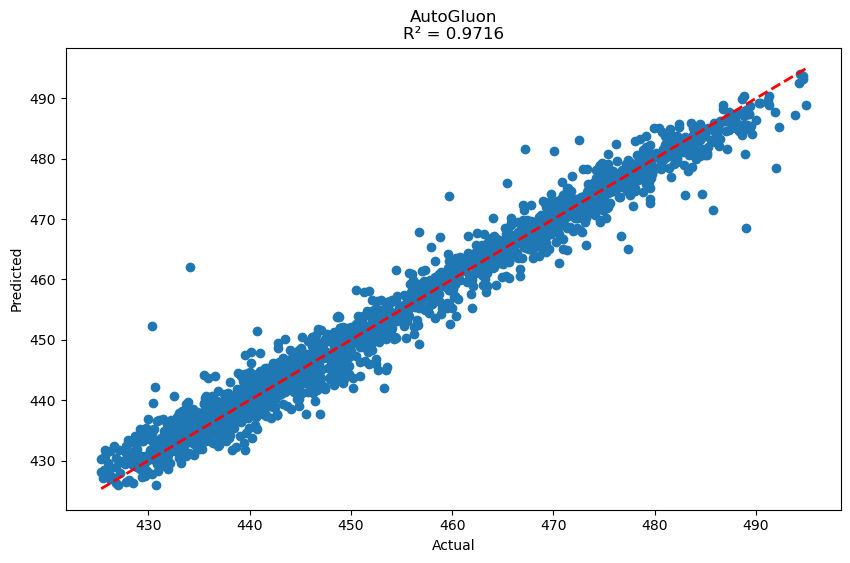

AutoGluon R² Score: 0.9716

AutoGluon Leaderboard:
                  model  score_val eval_metric  pred_time_val   fit_time  \
0   WeightedEnsemble_L2   0.977072          r2       0.028933  97.244236   
1              CatBoost   0.976285          r2       0.006567  93.241880   
2         LightGBMLarge   0.975240          r2       0.015488   2.333541   
3               XGBoost   0.974530          r2       0.006264   1.550494   
4              LightGBM   0.973804          r2       0.012266   1.751037   
5            LightGBMXT   0.970271          r2       0.132967   9.829565   
6       RandomForestMSE   0.967139          r2       0.120966   1.359640   
7         ExtraTreesMSE   0.966891          r2       0.120486   0.730277   
8        NeuralNetTorch   0.956759          r2       0.005555  66.297648   
9        KNeighborsDist   0.951584          r2       0.016251   0.015777   
10      NeuralNetFastAI   0.947741          r2       0.019820  14.475296   
11       KNeighborsUnif   0.946463   

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from autogluon.tabular import TabularPredictor
import os

# Create outputs folder if it doesn't exist
if not os.path.exists('outputs'):
    os.makedirs('outputs')

# Load and prepare data
dataset = pd.read_csv('raw_data/Data.csv')
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Combine X_train and y_train for AutoGluon
train_data = pd.concat([X_train, y_train], axis=1)
train_data.columns = list(X_train.columns) + ['target']

# AutoGluon
predictor = TabularPredictor(label='target', eval_metric='r2').fit(train_data, time_limit=600)
y_pred_autogluon = predictor.predict(X_test)
r2_autogluon = r2_score(y_test, y_pred_autogluon)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_autogluon)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'AutoGluon\nR² = {r2_autogluon:.4f}')
plt.savefig('outputs/autogluon_results.png')
plt.show()  # Display the plot in the notebook

print(f"AutoGluon R² Score: {r2_autogluon:.4f}")
print("\nAutoGluon Leaderboard:")
print(predictor.leaderboard())

# Save leaderboard to CSV
predictor.leaderboard().to_csv('outputs/autogluon_leaderboard.csv', index=False)

### Tpot

                                                                             
Generation 1 - Current best internal CV score: -11.312295841903556
                                                                              
Generation 2 - Current best internal CV score: -11.312295841903556
                                                                              
Generation 3 - Current best internal CV score: -11.312295841903556
                                                                              
Generation 4 - Current best internal CV score: -11.312295841903556
                                                                              
Generation 5 - Current best internal CV score: -11.283940769416096
                                                                              
Best pipeline: XGBRegressor(input_matrix, learning_rate=0.1, max_depth=9, min_child_weight=15, n_estimators=100, n_jobs=1, objective=reg:squarederror, subsample=0.6500000000000001, verbosity=0

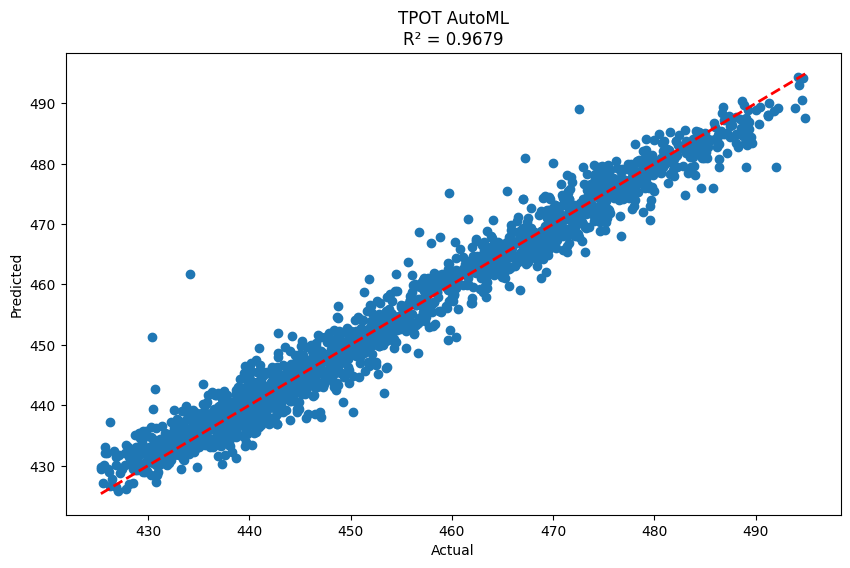


TPOT AutoML R² Score: 0.9679

TPOT AutoML Best Pipeline:
Pipeline(steps=[('xgbregressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=9, max_leaves=None, min_child_weight=15,
                              missing=nan, monotone_constraints=None,
                              multi_strategy=None, n

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tpot import TPOTRegressor
import os

# Create outputs folder if it doesn't exist
if not os.path.exists('outputs'):
    os.makedirs('outputs')

# Load and prepare data
dataset = pd.read_csv('raw_data/Data.csv')
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# TPOT AutoML
tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=42, max_time_mins=15)
tpot.fit(X_train, y_train)

y_pred_tpot = tpot.predict(X_test)
r2_tpot = r2_score(y_test, y_pred_tpot)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_tpot)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'TPOT AutoML\nR² = {r2_tpot:.4f}')
plt.savefig('outputs/tpot_results.png')
plt.show()  # Display the plot in the notebook

print(f"\nTPOT AutoML R² Score: {r2_tpot:.4f}")
print("\nTPOT AutoML Best Pipeline:")
print(tpot.fitted_pipeline_)

# Save best pipeline to file
with open('outputs/tpot_best_pipeline.txt', 'w') as f:
    f.write(str(tpot.fitted_pipeline_))